## injection levels

In [ ]:
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 18})  # Increase the font size here as needed

# Experimental conditions
injection_levels = ['0%', '20%', '40%', '60%', '80%', '100%']
synthetic_sentences = [0, 10, 20, 30, 40, 50]
natural_sentences = [50, 40, 30, 20, 10, 0]

# Create the plot
plt.figure(figsize=(8, 3))  # Adjusted figure size for better visibility
plt.bar(injection_levels, natural_sentences, label='Natural', color='forestgreen')  # Changed to forest green for natural
plt.bar(injection_levels, synthetic_sentences, bottom=natural_sentences, label='Synthetic', color='darkgray', hatch='')  # Changed to dark gray for synthetic

# Adding labels and title
plt.xlabel('Injection Levels')
plt.ylabel('Sentence Count')
plt.legend()

# Set the y-ticks
plt.yticks(range(0, 51, 10))  # Adjusts y-ticks to go from 0 to 50, incrementing by 10

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('final/injection_levels_plot.png', bbox_inches='tight')  # Ensure all content is included

# Show the plot
plt.show()

# all-year dimensions combined

## all-year intervals - raw

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Define colors, line styles, and marker styles
colors = {
    'abuse': '#8B0000',
    'anxiety': '#FF4500',
    'depression': '#483D8B',
    'mental_health': '#008080',
    'mental_illness': '#6A0DAD',
    'trauma': '#DC143C',
}
line_styles = {
    'abuse': '-',
    'anxiety': '--',
    'depression': '-.',
    'mental_health': ':',
    'mental_illness': (0, (3, 10, 1, 10)),
    'trauma': (0, (5, 1))
}
marker_styles = {
    'abuse': 'o',
    'anxiety': 's',
    'depression': 'D',
    'mental_health': '^',
    'mental_illness': 'v',
    'trauma': 'P'
}

# Labels for each plot's Y-axis and internal labels
y_axis_labels = {
    0: 'Valence Index',
    1: 'Valence Index',
    2: 'Arousal Index',
    3: 'Arousal Index',
    4: 'Cosine Distance'
}

internal_labels = {
    0: 'Positive Sentiment Injection',
    1: 'Negative Sentiment Injection',
    2: 'High Intensity Injection',
    3: 'Low Intensity Injection',
    4: 'Diverse Contexts Injection'
}

# Load data
df_valence = pd.read_csv("../1_sentiment/output/baseline_averaged_valence_index_all-year.csv")
df_arousal = pd.read_csv("../3_intensity/output/baseline_averaged_arousal_index_all-year.csv")
df_cosine = pd.read_csv("../2_breadth/output/baseline_final_combined.all-year.cds_mpnet.csv")

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(14, 28), sharex=True, gridspec_kw={'hspace': 0.05})

# Plotting for Valence, Arousal, and Cosine Distance
for idx, ax in enumerate(axs):
    y_min, y_max = float('inf'), -float('inf')
    if idx < 4:
        # Use the df_valence or df_arousal as appropriate
        data_df = df_valence if idx < 2 else df_arousal
        inj_ratio_col = 'injection_ratio'
    else:
        # Use df_cosine for the last plot
        data_df = df_cosine
        inj_ratio_col = 'inj_ratio'

    for term in colors.keys():
        sorted_data = data_df[data_df['target'].str.lower() == term].sort_values(by=inj_ratio_col) if idx < 4 else data_df[data_df['term'].str.lower().replace('_', ' ') == term].sort_values(by=inj_ratio_col)
        data_key = 'avg_valence_index_positive' if idx == 0 else 'avg_valence_index_negative' if idx == 1 else 'avg_arousal_index_high' if idx == 2 else 'avg_arousal_index_low' if idx == 3 else 'cosine_dissim_mean'
        se_key = 'se_valence_index_positive' if idx == 0 else 'se_valence_index_negative' if idx == 1 else 'se_arousal_index_high' if idx == 2 else 'se_arousal_index_low' if idx == 3 else 'cosine_dissim_se'

        line, = ax.plot(sorted_data[inj_ratio_col], sorted_data[data_key], linestyle=line_styles[term], marker=marker_styles[term], markersize=14, linewidth=3, color=colors[term])
        ax.errorbar(sorted_data[inj_ratio_col], sorted_data[data_key], yerr=sorted_data[se_key], fmt='', linestyle='', color=colors[term])

        y_min = min(y_min, (sorted_data[data_key] - sorted_data[se_key]).min())
        y_max = max(y_max, (sorted_data[data_key] + sorted_data[se_key]).max())

    ax.set_ylim(y_min - 0.2 * (y_max - y_min), y_max + 0.2 * (y_max - y_min))
    ax.set_ylabel(y_axis_labels[idx], fontsize=32)
    ax.text(0.05, 0.95, internal_labels[idx], transform=ax.transAxes, fontsize=25, verticalalignment='top', fontweight='bold')

# Set x-axis label on the last plot
axs[-1].set_xlabel('Synthetic Injection Levels (%)', fontsize=32)

# Common configurations for all axes
for ax in axs:
    ax.axvspan(10, 90, color='darkgrey', alpha=0.7)
    ax.axvspan(90, 105, color='darkgrey', alpha=1)
    ax.set_xlim(-5, 105)
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=28)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
    ax.tick_params(axis='both', labelsize=28)

# Creating legend
handles = [plt.Line2D([0], [0], color=colors[term], linestyle=line_styles[term], marker=marker_styles[term],
                      markersize=14, linewidth=3, label=legend_labels[term]) for term in colors]
legend = fig.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, 0.07), fontsize=27, ncol=3, frameon=False, title="Target Terms")
plt.setp(legend.get_title(), fontsize=30) #, fontweight='bold')

# Ensuring the layout accommodates the new legend position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("plot_combined_all-year.png", dpi=600, bbox_inches='tight')
plt.show()

## all-year intervals - scaled

KeyError: 'avg_valence_index_positive'

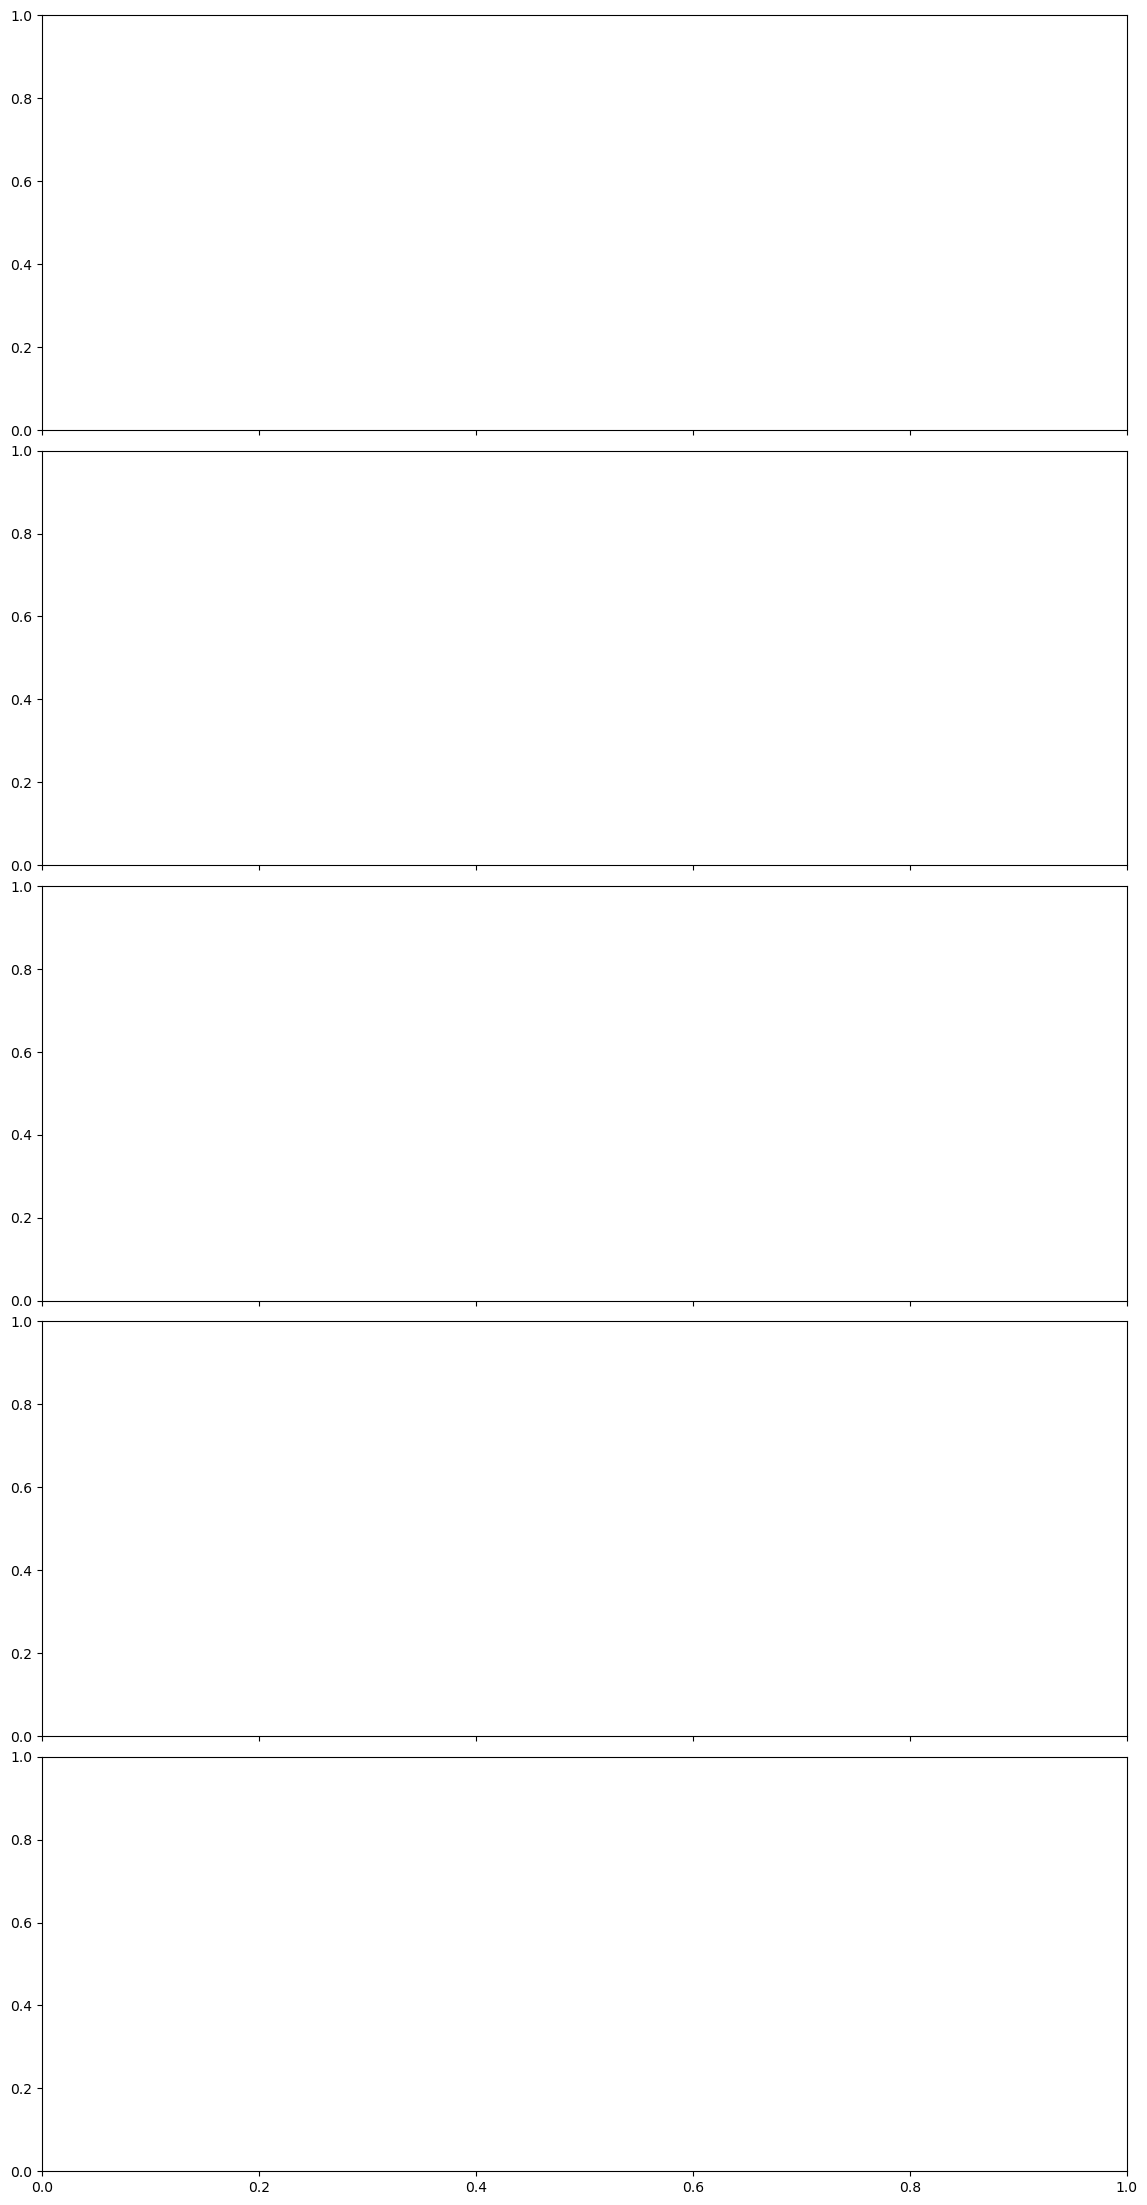

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Define colors, line styles, marker styles, and labels for legend
colors = {
    'abuse': '#8B0000',
    'anxiety': '#FF4500',
    'depression': '#483D8B',
    'mental_health': '#008080',
    'mental_illness': '#6A0DAD',
    'trauma': '#DC143C',
}
line_styles = {
    'abuse': '-',
    'anxiety': '--',
    'depression': '-.',
    'mental_health': ':',
    'mental_illness': (0, (3, 10, 1, 10)),
    'trauma': (0, (5, 1))
}
marker_styles = {
    'abuse': 'o',
    'anxiety': 's',
    'depression': 'D',
    'mental_health': '^',
    'mental_illness': 'v',
    'trauma': 'P'
}
legend_labels = {
    'abuse': 'Abuse',
    'anxiety': 'Anxiety',
    'depression': 'Depression',
    'mental_health': 'Mental Health',
    'mental_illness': 'Mental Illness',
    'trauma': 'Trauma'
}

# Labels for each plot's Y-axis and internal labels
y_axis_labels = {
    0: 'Valence Index',
    1: 'Valence Index',
    2: 'Arousal Index',
    3: 'Arousal Index',
    4: 'Cosine Distance'
}
internal_labels = {
    0: 'Positive Sentiment Injection',
    1: 'Negative Sentiment Injection',
    2: 'High Intensity Injection',
    3: 'Low Intensity Injection',
    4: 'Diverse Contexts Injection'
}

# Load data
df_valence = pd.read_csv("../1_sentiment/output/baseline_averaged_valence_index_all-year_normalized.csv")
df_arousal = pd.read_csv("../3_intensity/output/baseline_averaged_arousal_index_all-year_normalized.csv")
df_cosine = pd.read_csv("../2_breadth/output/baseline_final_combined.all-year.cds_mpnet.csv")

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(14, 28), sharex=True, gridspec_kw={'hspace': 0.05})

# Plotting for Valence, Arousal, and Cosine Distance
for idx, ax in enumerate(axs):
    y_min, y_max = float('inf'), -float('inf')
    if idx < 4:
        data_df = df_valence if idx < 2 else df_arousal
        inj_ratio_col = 'injection_ratio'
    else:
        data_df = df_cosine
        inj_ratio_col = 'inj_ratio'

    for term in colors.keys():
        sorted_data = data_df[data_df['target'].str.lower() == term].sort_values(by=inj_ratio_col) if idx < 4 else data_df[data_df['term'].str.lower().replace('_', ' ') == term].sort_values(by=inj_ratio_col)
        data_key = 'avg_valence_index_positive' if idx == 0 else 'avg_valence_index_negative' if idx == 1 else 'avg_arousal_index_high' if idx == 2 else 'avg_arousal_index_low' if idx == 3 else 'cosine_dissim_mean'
        se_key = 'se_valence_index_positive' if idx == 0 else 'se_valence_index_negative' if idx == 1 else 'se_arousal_index_high' if idx == 2 else 'se_arousal_index_low' if idx == 3 else 'cosine_dissim_se'

        line, = ax.plot(sorted_data[inj_ratio_col], sorted_data[data_key], linestyle=line_styles[term], marker=marker_styles[term], markersize=14, linewidth=3, color=colors[term])
        ax.errorbar(sorted_data[inj_ratio_col], sorted_data[data_key], yerr=sorted_data[se_key], fmt='', linestyle='', color=colors[term])

        y_min = min(y_min, (sorted_data[data_key] - sorted_data[se_key]).min())
        y_max = max(y_max, (sorted_data[data_key] + sorted_data[se_key]).max())

    ax.set_ylim(y_min - 0.3 * (y_max - y_min), y_max + 0.2 * (y_max - y_min))
    ax.set_ylabel(y_axis_labels[idx], fontsize=32)
    ax.text(0.05, 0.95, internal_labels[idx], transform=ax.transAxes, fontsize=25, verticalalignment='top', fontweight='bold')

# Set x-axis label on the last plot
axs[-1].set_xlabel('Synthetic Injection Levels (%)', fontsize=32)

# Common configurations for all axes
for ax in axs:
    ax.axvspan(10, 90, color='darkgrey', alpha=0.7)
    ax.axvspan(90, 105, color='darkgrey', alpha=1)
    ax.set_xlim(-5, 105)
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=28)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
    ax.tick_params(axis='both', labelsize=28)

# Creating legend
handles = [plt.Line2D([0], [0], color=colors[term], linestyle=line_styles[term], marker=marker_styles[term],
                      markersize=14, linewidth=3, label=legend_labels[term]) for term in colors]
legend = fig.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, 0.07), fontsize=27, ncol=3, frameon=False, title="Target Terms")
plt.setp(legend.get_title(), fontsize=30)

# Ensuring the layout accommodates the new legend position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("final/plot_combined_all-year_scaled.png", dpi=600, bbox_inches='tight')
plt.show()

## all-year intervals - scaled + LSC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Define colors, line styles, marker styles, and labels for legend
colors = {
    'abuse': '#8B0000',
    'anxiety': '#FF4500',
    'depression': '#483D8B',
    'mental_health': '#008080',
    'mental_illness': '#6A0DAD',
    'trauma': '#DC143C',
}
line_styles = {
    'abuse': '-',
    'anxiety': '--',
    'depression': '-.',
    'mental_health': ':',
    'mental_illness': (0, (3, 10, 1, 10)),
    'trauma': (0, (5, 1))
}
marker_styles = {
    'abuse': 'o',
    'anxiety': 's',
    'depression': 'D',
    'mental_health': '^',
    'mental_illness': 'v',
    'trauma': 'P'
}
legend_labels = {
    'abuse': 'Abuse',
    'anxiety': 'Anxiety',
    'depression': 'Depression',
    'mental_health': 'Mental Health',
    'mental_illness': 'Mental Illness',
    'trauma': 'Trauma'
}

# Load data
df_valence = pd.read_csv("../1_sentiment/output/baseline_averaged_valence_index_all-year_normalized.csv")
df_arousal = pd.read_csv("../3_intensity/output/baseline_averaged_arousal_index_all-year_normalized.csv")
df_cosine = pd.read_csv("../2_breadth/output/baseline_final_combined.all-year.cds_mpnet.csv")
df_lexeme = pd.read_csv("../xl_lexeme_results.csv")

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(14, 28), sharex=True, gridspec_kw={'hspace': 0.05})

for idx, ax in enumerate(axs):
    ax2 = ax.twinx()  # Create a second y-axis
    if idx < 4:
        data_df = df_valence if idx < 2 else df_arousal
        inj_ratio_col = 'injection_ratio'
    else:
        data_df = df_cosine
        inj_ratio_col = 'inj_ratio'

    # Plotting existing data and adding Lexeme data
    for term in colors.keys():
        if 'target' in data_df.columns:
            sorted_data = data_df[data_df['target'].str.lower() == term].sort_values(by=inj_ratio_col)
        else:
            sorted_data = data_df[data_df['term'].str.lower().replace('_', ' ') == term].sort_values(by=inj_ratio_col)

        data_key = 'avg_valence_index_positive' if idx == 0 else 'avg_valence_index_negative' if idx == 1 else 'avg_arousal_index_high' if idx == 2 else 'avg_arousal_index_low' if idx == 3 else 'cosine_dissim_mean'
        se_key = 'se_valence_index_positive' if idx == 0 else 'se_valence_index_negative' if idx == 1 else 'se_arousal_index_high' if idx == 2 else 'se_arousal_index_low' if idx == 3 else 'cosine_dissim_se'

        ax.plot(sorted_data[inj_ratio_col], sorted_data[data_key], linestyle=line_styles[term], marker=marker_styles[term], markersize=14, linewidth=3, color=colors[term])
        ax.errorbar(sorted_data[inj_ratio_col], sorted_data[data_key], yerr=sorted_data[se_key], fmt='', linestyle='', color=colors[term])

        # Adding Lexeme data if available
        lexeme_data = df_lexeme[(df_lexeme['target'].str.lower() == term) & (df_lexeme['dimension'] == ('sentiment' if idx < 2 else 'intensity' if idx < 4 else 'breadth')) & (df_lexeme['condition'] == ('positive' if idx % 2 == 0 else 'negative' if idx % 2 == 1 else 'high'))]
        for col in ['20_0', '40_0', '60_0', '80_0', '100_0']:
            if not lexeme_data.empty:
                ax2.scatter(int(col.split('_')[0]), lexeme_data[col].values[0], color=colors[term], marker='x', s=100, label='Lexeme ' + term)

    # Add shading and LSC Score label
    ax2.set_ylabel('LSC Score', fontsize=32)
    ax.axvspan(10, 90, color='darkgrey', alpha=0.7)
    ax.axvspan(90, 105, color='darkgrey', alpha=1)

# Common configurations
axs[-1].set_xlabel('Synthetic Injection Levels (%)', fontsize=32)
for ax in axs:
    ax.set_xlim(-5, 105)
    ax.set_xticks([0, 20, 40, 60, 80, 100])
    ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=28)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
    ax.tick_params(axis='both', labelsize=28)

# Legend
handles = [plt.Line2D([0], [0], color=colors[term], linestyle=line_styles[term], marker=marker_styles[term], markersize=14, linewidth=3, label=legend_labels[term]) for term in colors]
legend = fig.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, 0.07), fontsize=27, ncol=3, frameon=False, title="Target Terms")
plt.setp(legend.get_title(), fontsize=30)

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("plot_combined_all-year_scaled_lexeme.png", dpi=600, bbox_inches='tight')
plt.show()

## 5-year intervals

C:\Users\naomi\AppData\Local\Temp\ipykernel_15616\3307029794.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'epoch_interval'] = subset['epoch']
C:\Users\naomi\AppData\Local\Temp\ipykernel_15616\3307029794.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'epoch_interval'] = subset['epoch']
C:\Users\naomi\AppData\Local\Temp\ipykernel_15616\3307029794.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

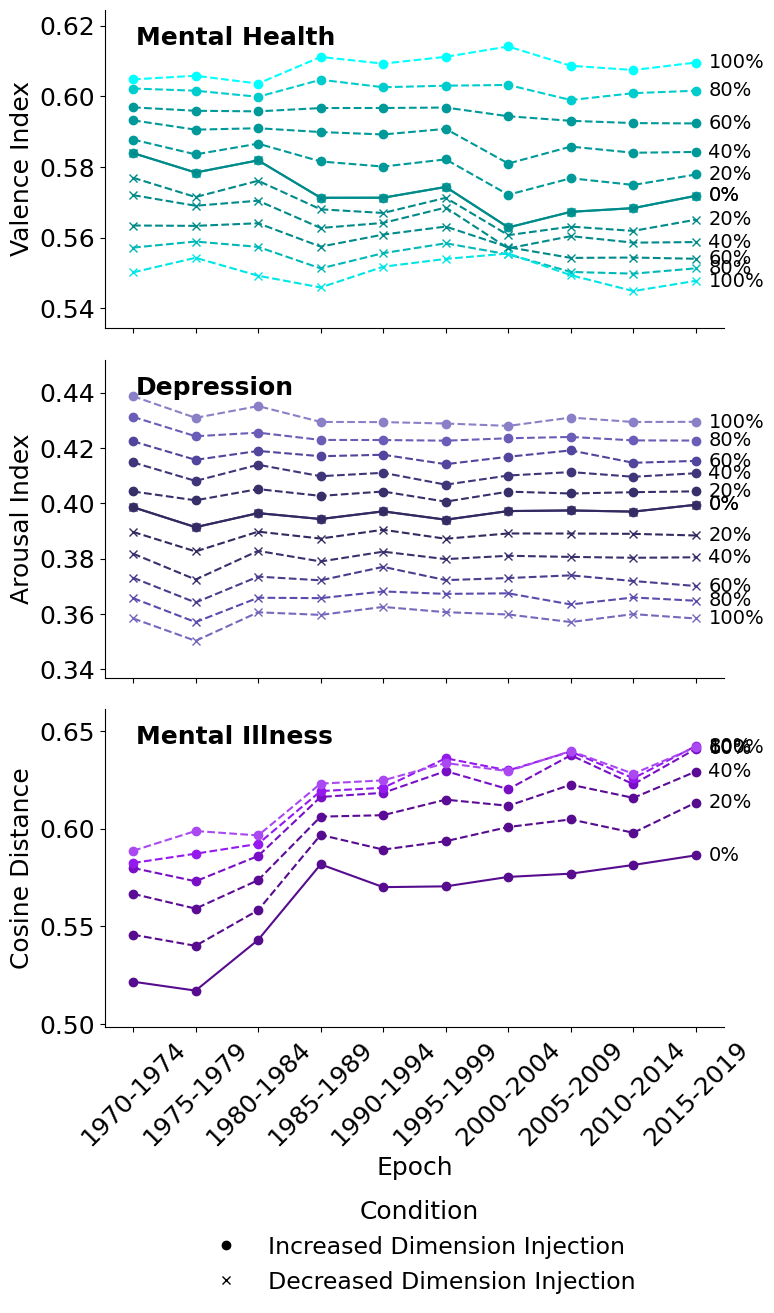

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import colorsys

# Load and standardize the datasets
df_sentiment = pd.read_csv("../1_sentiment/output/baseline_averaged_valence_index_5-year_normalized.csv")
df_intensity = pd.read_csv("../3_intensity/output/baseline_averaged_arousal_index_5-year_normalized.csv")
df_breadth = pd.read_csv("../2_breadth/output/baseline_final_combined.5-year.cds_mpnet.csv")
df_breadth.rename(columns={'inj_ratio': 'injection_ratio', 'term': 'target'}, inplace=True)

# Adjusted colors for better differentiation
colors = {
    'abuse': '#8B0000',
    'anxiety': '#FF6347',
    'depression': '#483D8B',
    'mental_health': '#008080',
    'mental_illness': '#6A0DAD',
    'trauma': '#DC143C',
}

def adjust_color_shade(base_color, ratio, is_positive=True):
    rgb_color = mcolors.to_rgb(base_color)
    hls_color = colorsys.rgb_to_hls(*rgb_color)
    lightness_adjustment = (ratio / 100 - 0.5) * 0.5
    lightness = max(0.3, min(1.0, hls_color[1] + lightness_adjustment))
    if not is_positive:
        lightness *= 0.9
    return colorsys.hls_to_rgb(hls_color[0], lightness, hls_color[2])

display_names = {
    'mental_health': 'Mental Health',
    'mental_illness': 'Mental Illness',
    'depression': 'Depression'
}

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
targets = ['mental_health', 'depression', 'mental_illness']
datasets = [df_sentiment, df_intensity, df_breadth]  # Order: Valence, Arousal, Cosine
labels = ['Valence Index', 'Arousal Index', 'Cosine Distance']

for ax, df, target, label in zip(axes, datasets, targets, labels):
    display_name = display_names[target]
    ax.text(0.05, 0.95, display_name, transform=ax.transAxes, fontsize=18, verticalalignment='top', color='black', weight='bold')
    
    y_min, y_max = float('inf'), float('-inf')
    
    for injection_ratio in sorted(df['injection_ratio'].unique()):
        subset = df[(df['target'] == target) & (df['injection_ratio'] == injection_ratio)]
        subset.loc[:, 'epoch_interval'] = subset['epoch']
        
        if label in ['Valence Index', 'Arousal Index']:
            pos_col = 'avg_valence_index_positive' if label == 'Valence Index' else 'avg_arousal_index_high'
            neg_col = 'avg_valence_index_negative' if label == 'Valence Index' else 'avg_arousal_index_low'
            y_min = min(y_min, subset[pos_col].min(), subset[neg_col].min())
            y_max = max(y_max, subset[pos_col].max(), subset[neg_col].max())
            
            # Plot **Increased** Injection
            ax.plot(subset['epoch_interval'], subset[pos_col], color=adjust_color_shade(colors[target], injection_ratio, True),
                    linestyle='--' if injection_ratio > 0 else '-', marker='o')
            
            # Plot **Decreased** Injection
            ax.plot(subset['epoch_interval'], subset[neg_col], color=adjust_color_shade(colors[target], injection_ratio, False),
                    linestyle='--' if injection_ratio > 0 else '-', marker='x')
            
            # **🔹 Add Injection Ratio Labels for Both Conditions**
            last_epoch = subset['epoch_interval'].iloc[-1]  # Get last epoch for alignment
            
            # Increased condition (o marker)
            last_value_incr = subset[pos_col].iloc[-1]
            ax.text(len(subset['epoch_interval']) - 1 + 0.2, last_value_incr, f"{injection_ratio}%", 
                    fontsize=14, verticalalignment='center', color='black')

            # Decreased condition (x marker)
            last_value_decr = subset[neg_col].iloc[-1]
            ax.text(len(subset['epoch_interval']) - 1 + 0.2, last_value_decr, f"{injection_ratio}%", 
                    fontsize=14, verticalalignment='center', color='black')

        else:
            y_min = min(y_min, subset['cosine_dissim_mean'].min())
            y_max = max(y_max, subset['cosine_dissim_mean'].max())
            ax.plot(subset['epoch_interval'], subset['cosine_dissim_mean'], color=adjust_color_shade(colors[target], injection_ratio),
                    linestyle='--' if injection_ratio > 0 else '-', marker='o')

            # **🔹 Add Injection Ratio Labels for Breadth Condition**
            last_value = subset['cosine_dissim_mean'].iloc[-1]
            ax.text(len(subset['epoch_interval']) - 1 + 0.2, last_value, f"{injection_ratio}%", 
                    fontsize=14, verticalalignment='center', color='black')

    ax.set_ylim([y_min - 0.15 * abs(y_max - y_min), y_max + 0.15 * abs(y_max - y_min)])
    ax.set_ylabel(label, fontsize=18)

    if ax == axes[-1]:
        ax.set_xlabel('Epoch', fontsize=18)
        ax.set_xticks(subset['epoch_interval'])
        ax.set_xticklabels(['1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019'], rotation=45)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=18)

# Creating legend **with title "Condition"**
legend = fig.legend(handles=[
    plt.Line2D([0], [0], color='black', linestyle='', marker='o', label='Increased Dimension Injection'),
    plt.Line2D([0], [0], color='black', linestyle='', marker='x', label='Decreased Dimension Injection')],
    loc='lower center', bbox_to_anchor=(0.55, -0.10), ncol=1, fontsize=17, frameon=False, title="Condition")

# **Set Legend Title Font Size**
legend.get_title().set_fontsize(18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig("final/plot_5-year_dimension_trends.png", dpi=600, bbox_inches='tight')
plt.show()

# LSC score

## all-year

### within bins (injection levels)

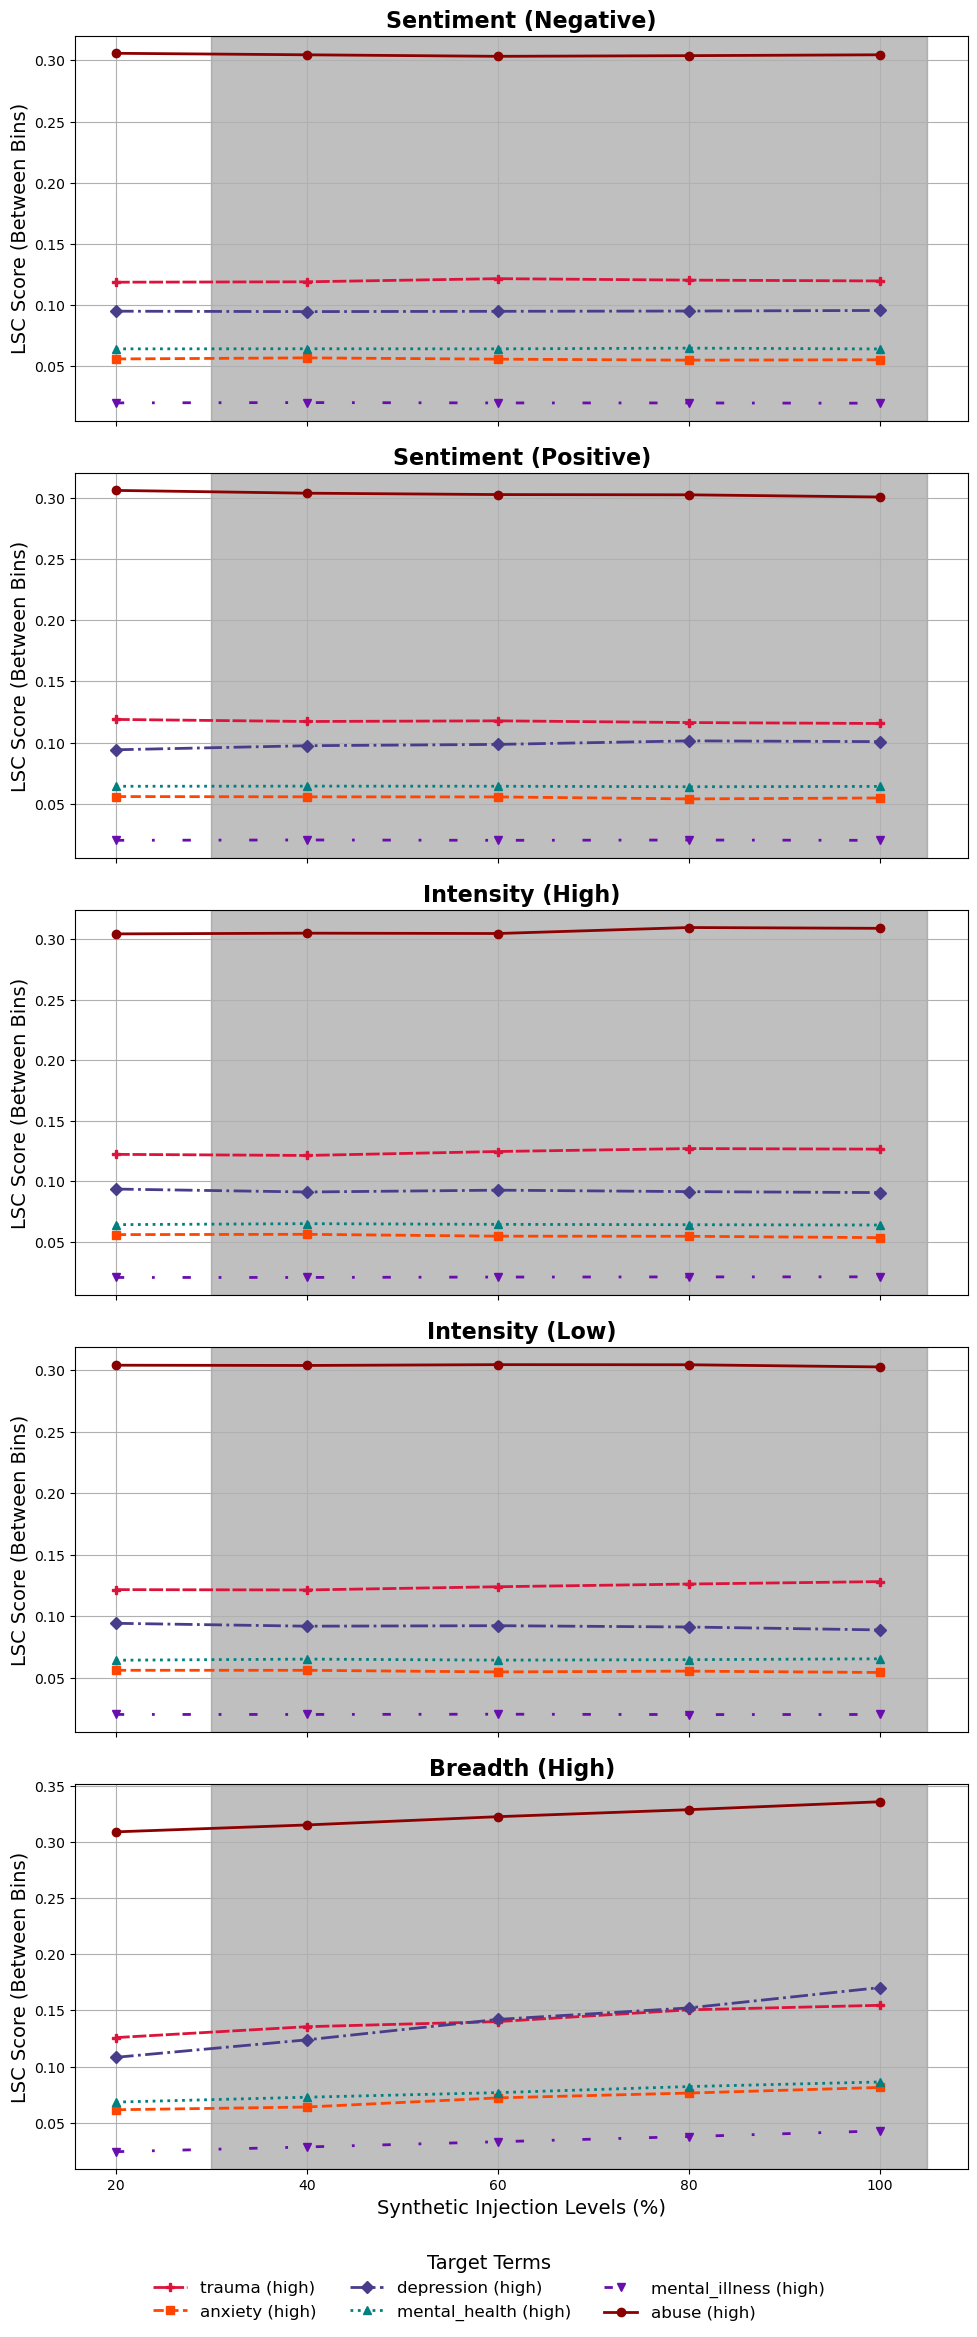

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
df = pd.read_csv("../4_general_LSC/xl_lexeme_results_all-year.csv")

# Define plot aesthetics
colors = {
    'abuse': '#8B0000', 'anxiety': '#FF4500', 'depression': '#483D8B',
    'mental_health': '#008080', 'mental_illness': '#6A0DAD', 'trauma': '#DC143C',
}
line_styles = {
    'abuse': '-', 'anxiety': '--', 'depression': '-.',
    'mental_health': ':', 'mental_illness': (0, (3, 10, 1, 10)), 'trauma': (0, (5, 1))
}
marker_styles = {
    'abuse': 'o', 'anxiety': 's', 'depression': 'D',
    'mental_health': '^', 'mental_illness': 'v', 'trauma': 'P'
}

# Identify unique combinations of dimension and condition present in the data
combinations = df[['dimension', 'condition']].drop_duplicates()
# Order dimensions explicitly
order = {'sentiment': 0, 'intensity': 1, 'breadth': 2}
combinations['sort_order'] = combinations['dimension'].map(order)
combinations.sort_values(by=['sort_order', 'condition'], inplace=True)

# Prepare subplots
fig, axs = plt.subplots(len(combinations), 1, figsize=(10, 5 * len(combinations)), sharex=True)
if len(combinations) == 1:  # If only one combination, axs won't be an array
    axs = [axs]

# Increase font sizes and tick sizes
plt.rc('font', size=14)  # controls default text sizes
plt.rc('axes', titlesize=16)  # fontsize of the axes title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)  # fontsize of the tick labels
plt.rc('ytick', labelsize=12)  # fontsize of the tick labels
plt.rc('legend', fontsize=12)  # legend fontsize
plt.rc('axes', titleweight='bold')  # bold titles

# Plotting logic
for ax, (_, combo) in zip(axs, combinations.iterrows()):
    sub_df = df[(df['dimension'] == combo['dimension']) & (df['condition'] == combo['condition'])]
    for term in sub_df['target'].unique():
        term_data = sub_df[sub_df['target'] == term]
        scores = term_data[['20_0', '40_0', '60_0', '80_0', '100_0']].values.flatten()
        ax.plot([20, 40, 60, 80, 100], scores, label=f"{term} ({combo['condition']})", linestyle=line_styles[term],
                marker=marker_styles[term], color=colors[term], linewidth=2)

    # Panel aesthetics
    ax.set_title(f"{combo['dimension'].capitalize()} ({combo['condition'].capitalize()})", fontsize=16, fontweight='bold')
    ax.set_ylabel("LSC Score (Between Bins)", fontsize=14)
    ax.grid(True)
    ax.axvspan(30, 105, color='grey', alpha=0.5)  # Adjusted grey shading to cover the whole x-axis range

# Legend placement
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=3, frameon=False, title="Target Terms", fontsize=12)

plt.xlabel('Synthetic Injection Levels (%)', fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the rect to not overlap with the bottom legend
plt.show()

# Change scores plot

#### raw

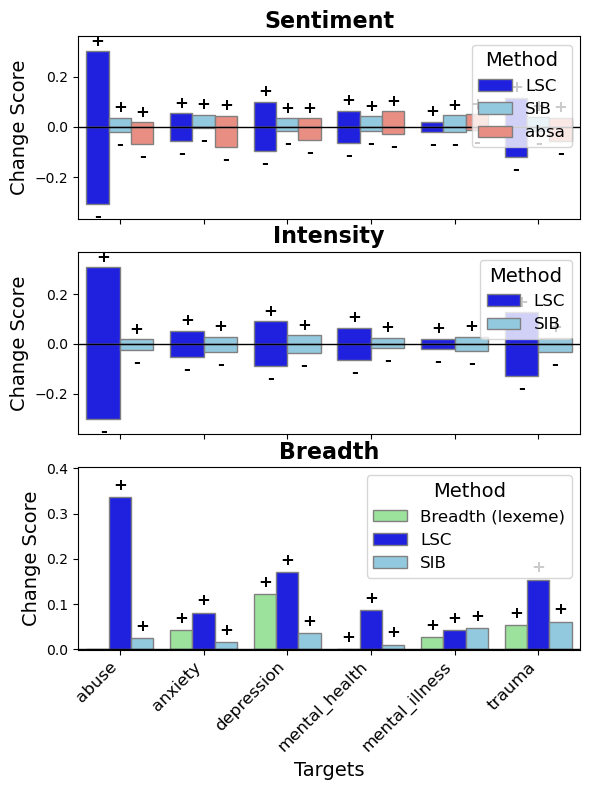

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("../model_comparison/final_change_scores_all-year.csv")

# Drop any potential blank rows
df = df.dropna()

# Ensure only the expected three dimensions are used
expected_dimensions = ["Sentiment", "Intensity", "Breadth"]
df = df[df['dimension'].isin(expected_dimensions)]

# Ensure 'change_score' is numeric
df['change_score'] = pd.to_numeric(df['change_score'], errors='coerce')

# Set up specific colors for each measure
color_palette = {
    'SIB': 'skyblue',
    'absa': 'salmon',
    'Breadth (lexeme)': 'lightgreen',
    'LSC': 'blue'
}

# Ensure negative values for Decrease conditions are correctly set
df.loc[df['condition'] == 'Decrease', 'change_score'] = -df['change_score'].abs()

# Create the figure with 3 rows (one per dimension) and a single column
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

# Loop through each dimension
for row, dimension in enumerate(expected_dimensions):
    subset = df[df['dimension'] == dimension]
    unique_measures = subset['measure'].unique()  # Get only the measures present in the subset
    filtered_palette = {k: v for k, v in color_palette.items() if k in unique_measures}  # Filter colors
    
    ax = axes[row]
    
    # Pivot dataset to stack Increase and Decrease bars properly
    subset_pivot = subset.pivot(index=['target', 'measure'], columns='condition', values='change_score').reset_index()

    # Plot Increase bars with black outlines
    sns.barplot(
        x="target", y="Increase", hue="measure", data=subset_pivot,
        palette=filtered_palette, ax=ax, dodge=True, errorbar=None, 
        edgecolor='grey', linewidth=1  # Adding black outline
    )
    
    # Plot Decrease bars with black outlines
    sns.barplot(
        x="target", y="Decrease", hue="measure", data=subset_pivot,
        palette=filtered_palette, ax=ax, dodge=True, errorbar=None, 
        edgecolor='grey', linewidth=1  # Adding black outline
    )

    ax.set_title(f'{dimension}', fontsize=16, fontweight='bold')
    ax.set_ylabel('Change Score', fontsize=14)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.axhline(0, color='black', linewidth=1)  # Add horizontal line at y=0
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
    
    # Annotate bars with "+" for Increase and "-" for Decrease
    for p in ax.patches:
        value = p.get_height()
        if abs(value) > 0.0001:  # Allow small values to be annotated
            label = "+" if value > 0 else "-"
            offset = 0.01 if value > 0 else -0.02  # Adjust annotation position
            ax.annotate(
                label, 
                (p.get_x() + p.get_width() / 2., value + offset), 
                ha='center', va='bottom' if value > 0 else 'top', 
                fontsize=12, fontweight='bold', color='black'
            )
    
    # Ensure each plot has only the relevant measures in the legend and remove duplicates
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate entries
    ax.legend(by_label.values(), by_label.keys(), title='Method', loc='upper right', fontsize=12, title_fontsize=14)
    
    # Set y-axis limits to ensure negative values are visible
    min_score = subset[['change_score']].min().min()
    max_score = subset[['change_score']].max().max()
    ax.set_ylim(min_score * 1.2, max_score * 1.2)  # Ensure range covers negative values
    
    # Only add x-axis label to the bottom panel
    if row == len(expected_dimensions) - 1:
        ax.set_xlabel('Targets', fontsize=14)
    else:
        ax.set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(hspace=0.18)
plt.savefig("final/plot_method_comparison_all-year_CS.png", dpi=600, bbox_inches='tight')
plt.show()

## 5-year

### average rate of change

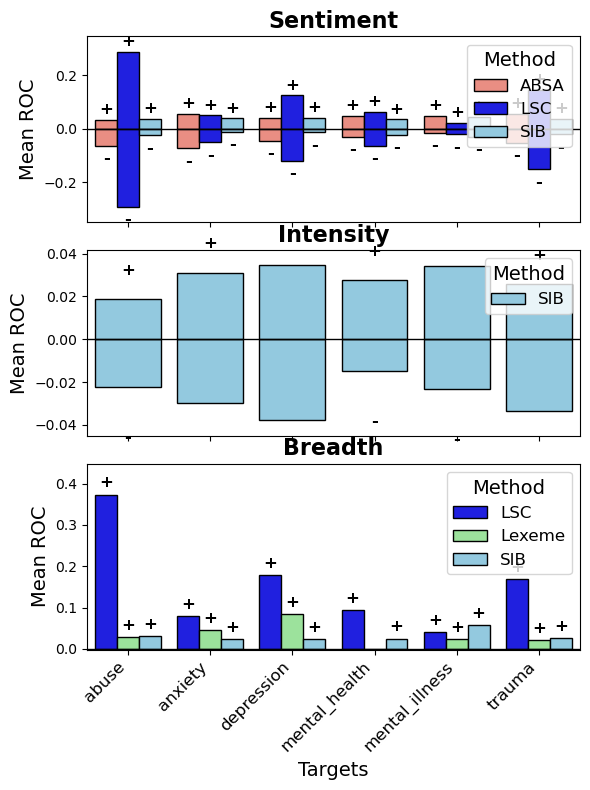

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final combined dataset
df = pd.read_csv("../model_comparison/final_combined_change_scores_5-year.csv")

# Drop any potential blank rows
df = df.dropna()

# Ensure only the expected three dimensions are used
expected_dimensions = ["Sentiment", "Intensity", "Breadth"]
df = df[df['dimension'].isin(expected_dimensions)]

# Ensure 'avg_rate_of_change' is numeric
df['avg_rate_of_change'] = pd.to_numeric(df['avg_rate_of_change'], errors='coerce')

# Define specific colors for each measure
color_palette = {
    'SIB': 'skyblue',
    'ABSA': 'salmon',
    'Lexeme': 'lightgreen',
    'LSC': 'blue'
}

# Create the figure with 3 rows (one per dimension) and a single column
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

# Loop through each dimension
for row, dimension in enumerate(expected_dimensions):
    subset = df[df['dimension'] == dimension]
    unique_measures = subset['measure'].unique()  # Get only the measures present in the subset
    filtered_palette = {k: v for k, v in color_palette.items() if k in unique_measures}  # Filter colors
    
    ax = axes[row]
    
    # Pivot dataset to organize Increase, Positive, Negative, and Low conditions
    subset_pivot = subset.pivot(index=['target', 'measure'], columns='condition', values='avg_rate_of_change').reset_index()

    # Ensure all conditions exist (prevent missing bars)
    conditions = ['increase', 'positive', 'negative', 'low', 'high']
    for condition in conditions:
        if condition not in subset_pivot.columns:
            subset_pivot[condition] = None  # Assign NaN if missing

    # Plot each condition separately for clarity
    for condition in conditions:
        sns.barplot(
            x="target", 
            y=condition, 
            hue="measure", 
            data=subset_pivot,
            palette=filtered_palette, 
            ax=ax, 
            dodge=True, 
            errorbar=None, 
            edgecolor='black'  # Add edges for visibility
        )

    ax.set_title(f'{dimension}', fontsize=16, fontweight='bold')
    ax.set_ylabel('Mean ROC', size=14)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.axhline(0, color='black', linewidth=1)  # Add horizontal line at y=0
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
    
    # Annotate bars with + and - signs instead of values
    for p in ax.patches:
        value = p.get_height()
        if abs(value) > 0.0001:  # Only annotate non-zero values
            label = "+" if value > 0 else "-"  # Replace numbers with + or -
            offset = 0.01 if value > 0 else -0.02  # Adjust annotation position
            ax.annotate(
                label, 
                (p.get_x() + p.get_width() / 2., value + offset), 
                ha='center', 
                va='bottom' if value > 0 else 'top', 
                fontsize=12, fontweight='bold', color='black'
            )
    
    # Ensure each plot has only the relevant measures in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate legend entries
    ax.legend(by_label.values(), by_label.keys(), title='Method', loc='upper right', fontsize=12, title_fontsize=14)
    
    # Set y-axis limits dynamically
    min_score = subset[['avg_rate_of_change']].min().min()
    max_score = subset[['avg_rate_of_change']].max().max()
    ax.set_ylim(min_score * 1.2, max_score * 1.2)  # Extend range slightly

    # Only add x-axis label to the bottom panel
    if row == len(expected_dimensions) - 1:
        ax.set_xlabel('Targets', fontsize=14)
    else:
        ax.set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.savefig("final/plot_method_comparison_5-year_avgROC.png", dpi=600, bbox_inches='tight')
plt.show()

### total change

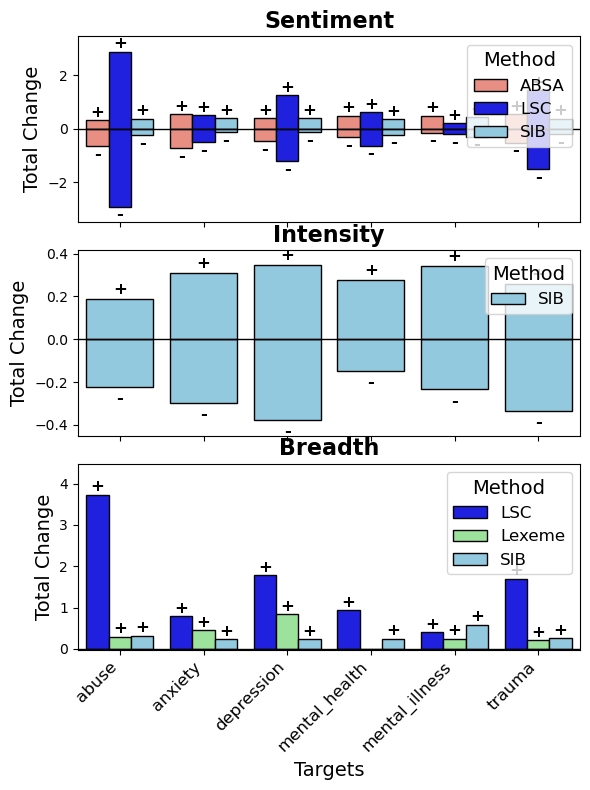

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final combined dataset
df = pd.read_csv("../model_comparison/final_combined_change_scores_5-year.csv")

# Drop any potential blank rows
df = df.dropna()

# Ensure only the expected three dimensions are used
expected_dimensions = ["Sentiment", "Intensity", "Breadth"]
df = df[df['dimension'].isin(expected_dimensions)]

# Ensure 'total_change' is numeric
df['total_change'] = pd.to_numeric(df['total_change'], errors='coerce')

# Define specific colors for each measure
color_palette = {
    'SIB': 'skyblue',
    'ABSA': 'salmon',
    'Lexeme': 'lightgreen',
    'LSC': 'blue'
}

# Create the figure with 3 rows (one per dimension) and a single column
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

# Loop through each dimension
for row, dimension in enumerate(expected_dimensions):
    subset = df[df['dimension'] == dimension]
    unique_measures = subset['measure'].unique()  # Get only the measures present in the subset
    filtered_palette = {k: v for k, v in color_palette.items() if k in unique_measures}  # Filter colors
    
    ax = axes[row]
    
    # Pivot dataset to organize Increase, Positive, Negative, and Low conditions
    subset_pivot = subset.pivot(index=['target', 'measure'], columns='condition', values='total_change').reset_index()

    # Ensure all conditions exist (prevent missing bars)
    conditions = ['increase', 'positive', 'negative', 'low', 'high']
    for condition in conditions:
        if condition not in subset_pivot.columns:
            subset_pivot[condition] = None  # Assign NaN if missing

    # Plot each condition separately for clarity
    for condition in conditions:
        sns.barplot(
            x="target", 
            y=condition, 
            hue="measure", 
            data=subset_pivot,
            palette=filtered_palette, 
            ax=ax, 
            dodge=True, 
            errorbar=None, 
            edgecolor='black'  # Add edges for visibility
        )

    ax.set_title(f'{dimension}', fontsize=16, fontweight='bold')
    ax.set_ylabel('Total Change', size=14)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.axhline(0, color='black', linewidth=1)  # Add horizontal line at y=0
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
    
    # Annotate bars with + and - signs instead of values
    for p in ax.patches:
        value = p.get_height()
        if abs(value) > 0.0001:  # Only annotate non-zero values
            label = "+" if value > 0 else "-"  # Replace numbers with + or -
            offset = 0.01 if value > 0 else -0.02  # Adjust annotation position
            ax.annotate(
                label, 
                (p.get_x() + p.get_width() / 2., value + offset), 
                ha='center', 
                va='bottom' if value > 0 else 'top', 
                fontsize=12, fontweight='bold', color='black'
            )
    
    # Ensure each plot has only the relevant measures in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate legend entries
    ax.legend(by_label.values(), by_label.keys(), title='Method', loc='upper right', fontsize=12, title_fontsize=14)
    
    # Set y-axis limits dynamically
    min_score = subset[['total_change']].min().min()
    max_score = subset[['total_change']].max().max()
    ax.set_ylim(min_score * 1.2, max_score * 1.2)  # Extend range slightly

    # Only add x-axis label to the bottom panel
    if row == len(expected_dimensions) - 1:
        ax.set_xlabel('Targets', fontsize=14)
    else:
        ax.set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.savefig("final/plot_method_comparison_5-year_total-change.png", dpi=600, bbox_inches='tight')
plt.show()

# Control analysis

## all-year combined

C:\Users\naomi\AppData\Local\Temp\ipykernel_15616\4085286406.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


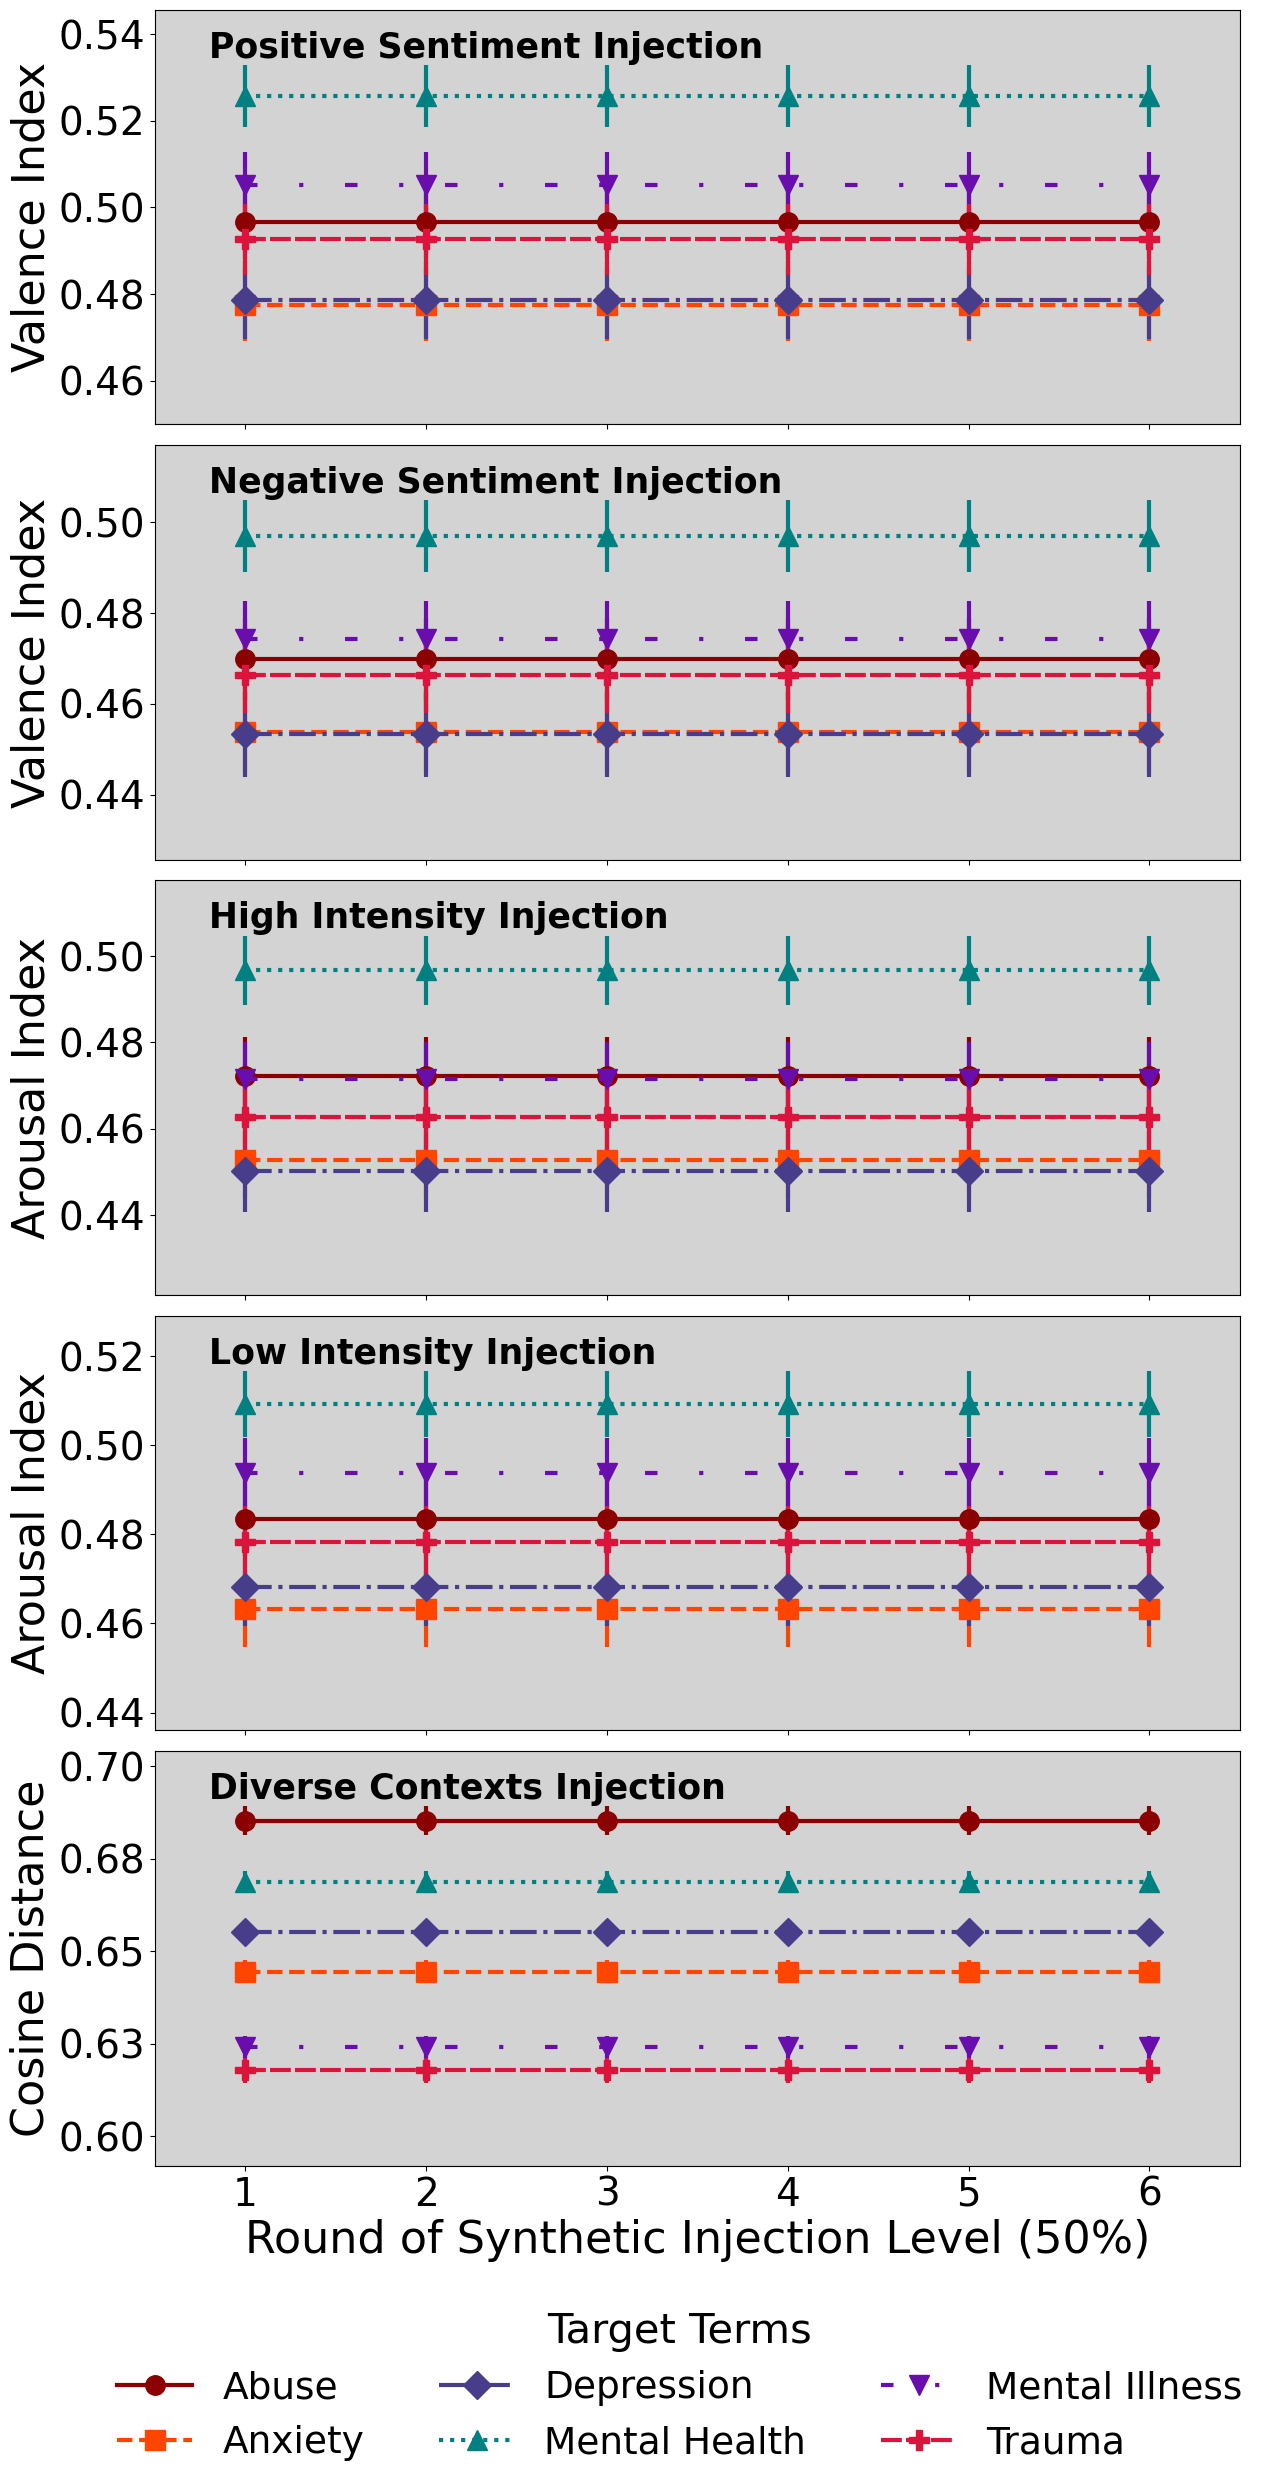

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Define colors, line styles, marker styles, and labels for legend
colors = {
    'abuse': '#8B0000',
    'anxiety': '#FF4500',
    'depression': '#483D8B',
    'mental_health': '#008080',
    'mental_illness': '#6A0DAD',
    'trauma': '#DC143C',
}
line_styles = {
    'abuse': '-',
    'anxiety': '--',
    'depression': '-.',
    'mental_health': ':',
    'mental_illness': (0, (3, 10, 1, 10)),
    'trauma': (0, (5, 1))
}
marker_styles = {
    'abuse': 'o',
    'anxiety': 's',
    'depression': 'D',
    'mental_health': '^',
    'mental_illness': 'v',
    'trauma': 'P'
}
legend_labels = {
    'abuse': 'Abuse',
    'anxiety': 'Anxiety',
    'depression': 'Depression',
    'mental_health': 'Mental Health',
    'mental_illness': 'Mental Illness',
    'trauma': 'Trauma'
}

# Labels for each plot's Y-axis and internal labels
y_axis_labels = {
    0: 'Valence Index',
    1: 'Valence Index',
    2: 'Arousal Index',
    3: 'Arousal Index',
    4: 'Cosine Distance'
}
internal_labels = {
    0: 'Positive Sentiment Injection',
    1: 'Negative Sentiment Injection',
    2: 'High Intensity Injection',
    3: 'Low Intensity Injection',
    4: 'Diverse Contexts Injection'
}

# Load data
df_valence = pd.read_csv("../1_sentiment/output/control_averaged_valence_index_all-year_normalized.csv")
df_arousal = pd.read_csv("../3_intensity/output/control_averaged_arousal_index_all-year_normalized.csv")
df_cosine = pd.read_csv("../2_breadth/output/control_final_combined.all-year.cds_mpnet.csv")

# Convert term names to lowercase to match dictionary
df_cosine['term'] = df_cosine['term'].str.lower()

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(14, 28), sharex=True, gridspec_kw={'hspace': 0.05})

# Plotting for Valence, Arousal, and Cosine Distance
for idx, ax in enumerate(axs):
    y_min, y_max = float('inf'), -float('inf')
    
    if idx < 4:
        data_df = df_valence if idx < 2 else df_arousal
        x_col = 'round_number'  # **🔹 X-axis now shows round_number**
    else:
        data_df = df_cosine
        x_col = 'round_number'  # **🔹 X-axis now shows round_number**

    for term in colors.keys():
        if idx < 4:
            sorted_data = data_df[data_df['target'].str.lower() == term].sort_values(by=x_col)
        else:
            sorted_data = data_df[data_df['term'] == term].sort_values(by=x_col)

        data_key = ('avg_valence_index_positive' if idx == 0 else 
                    'avg_valence_index_negative' if idx == 1 else 
                    'avg_arousal_index_high' if idx == 2 else 
                    'avg_arousal_index_low' if idx == 3 else 
                    'cosine_dissim_mean')
        
        se_key = ('se_valence_index_positive' if idx == 0 else 
                  'se_valence_index_negative' if idx == 1 else 
                  'se_arousal_index_high' if idx == 2 else 
                  'se_arousal_index_low' if idx == 3 else 
                  'cosine_dissim_se')

        # **🔹 Plot lines with error bars**
        ax.errorbar(sorted_data[x_col], sorted_data[data_key], yerr=sorted_data[se_key], 
                    linestyle=line_styles[term], marker=marker_styles[term], markersize=14, linewidth=3, 
                    color=colors[term])

        y_min = min(y_min, (sorted_data[data_key] - sorted_data[se_key]).min())
        y_max = max(y_max, (sorted_data[data_key] + sorted_data[se_key]).max())

    # Set y-axis labels dynamically
    ax.set_ylim(y_min - 0.3 * (y_max - y_min), y_max + 0.2 * (y_max - y_min))
    ax.set_ylabel(y_axis_labels[idx], fontsize=32)
    ax.text(0.05, 0.95, internal_labels[idx], transform=ax.transAxes, fontsize=25, verticalalignment='top', fontweight='bold')

# **🔹 Set x-axis label to "Round Number"**
axs[-1].set_xlabel('Round of Synthetic Injection Level (50%)', fontsize=32)

# Common configurations for all axes
for ax in axs:
    ax.axvspan(0, 6.5, color='darkgrey', alpha=0.5)
    ax.set_xlim(0.5, df_cosine['round_number'].max() + 0.5)  # Ensures all round numbers appear
    ax.set_xticks(range(1, df_cosine['round_number'].max() + 1))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.2f}'))
    ax.tick_params(axis='both', labelsize=28)

# Creating legend
handles = [plt.Line2D([0], [0], color=colors[term], linestyle=line_styles[term], marker=marker_styles[term],
                      markersize=14, linewidth=3, label=legend_labels[term]) for term in colors]
legend = fig.legend(handles=handles, loc="upper center", bbox_to_anchor=(0.5, 0.07), fontsize=27, ncol=3, frameon=False, title="Target Terms")
plt.setp(legend.get_title(), fontsize=30)

# Ensuring the layout accommodates the new legend position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("final/plot_combined_all-year_rounds_scaled_controls.png", dpi=600, bbox_inches='tight')
plt.show()

## 5-year intervals

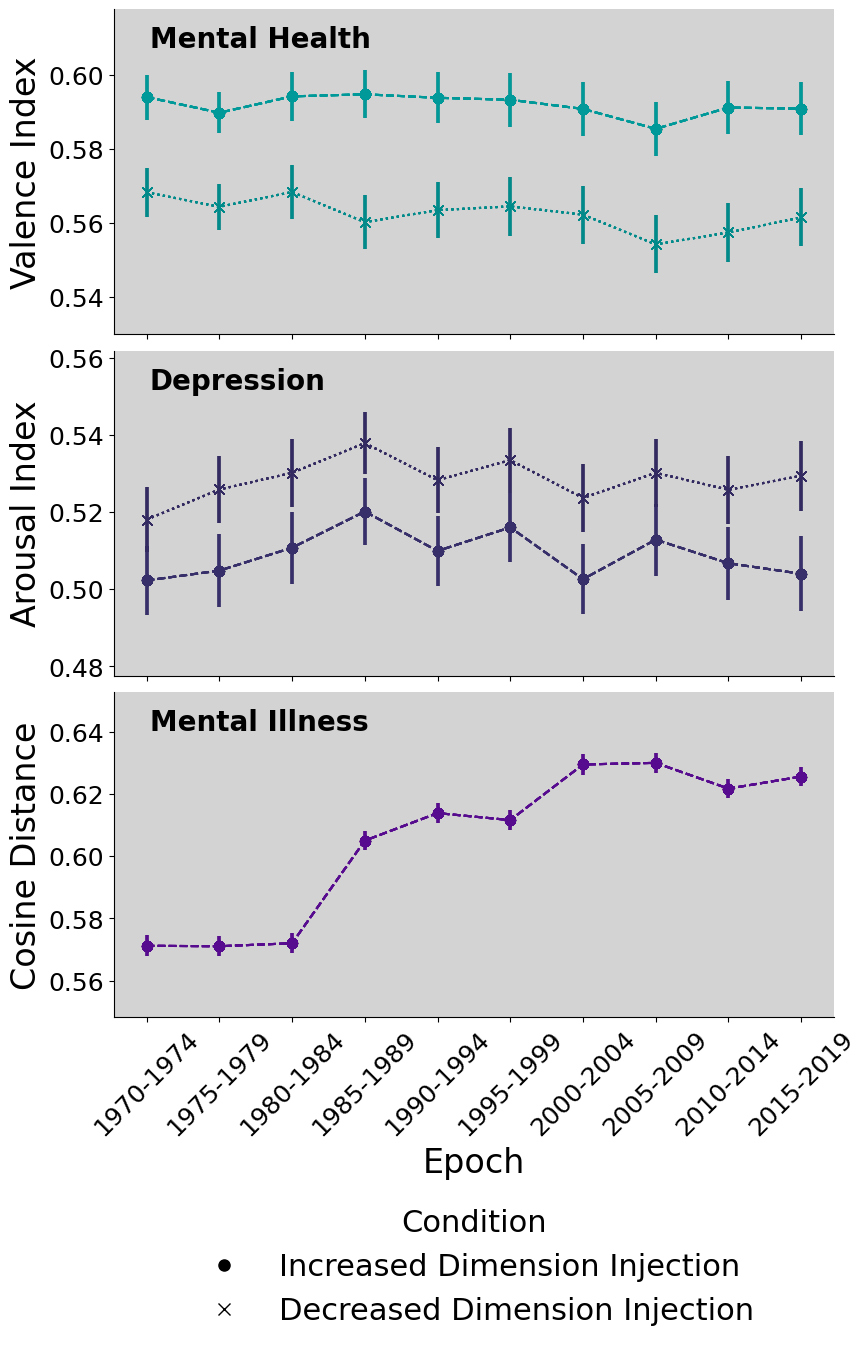

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import colorsys

# Load and standardize the datasets
df_sentiment = pd.read_csv("../1_sentiment/output/control_averaged_valence_index_5-year_normalized.csv")
df_intensity = pd.read_csv("../3_intensity/output/control_averaged_arousal_index_5-year_normalized.csv")
df_breadth = pd.read_csv("../2_breadth/output/control_final_combined.5-year.cds_mpnet.csv")

# Rename columns for consistency
df_breadth.rename(columns={'inj_ratio': 'injection_ratio', 'term': 'target'}, inplace=True)

# Convert term names to lowercase for consistency
df_breadth['target'] = df_breadth['target'].str.lower()
df_sentiment['target'] = df_sentiment['target'].str.lower()
df_intensity['target'] = df_intensity['target'].str.lower()

# Merge datasets based on (epoch, target)
df_merged = df_sentiment.merge(df_intensity, on=['epoch', 'target', 'injection_ratio'], suffixes=('_valence', '_arousal'))
df_merged = df_merged.merge(df_breadth, on=['epoch', 'target'], suffixes=('', '_breadth'))

# Ensure correct column mapping
df_merged.rename(columns={'round_number': 'round'}, inplace=True)

# Convert epoch labels to numerical indices for plotting
unique_epochs = sorted(df_merged['epoch'].unique())
epoch_mapping = {epoch: i for i, epoch in enumerate(unique_epochs)}
df_merged['epoch_num'] = df_merged['epoch'].map(epoch_mapping)

# Colors for each target term
colors = {
    'abuse': '#8B0000',
    'anxiety': '#FF6347',
    'depression': '#483D8B',
    'mental_health': '#008080',
    'mental_illness': '#6A0DAD',
    'trauma': '#DC143C',
}

# Function to adjust color shades
def adjust_color_shade(base_color, ratio, is_positive=True):
    rgb_color = mcolors.to_rgb(base_color)
    hls_color = colorsys.rgb_to_hls(*rgb_color)
    lightness_adjustment = (ratio / 100 - 0.5) * 0.5
    lightness = max(0.3, min(1.0, hls_color[1] + lightness_adjustment))
    if not is_positive:
        lightness *= 0.9
    return colorsys.hls_to_rgb(hls_color[0], lightness, hls_color[2])

# Display names for plot labels
display_names = {
    'mental_health': 'Mental Health',
    'mental_illness': 'Mental Illness',
    'depression': 'Depression'
}

# Get min/max numerical epoch values for shading
epoch_min = min(df_merged['epoch_num']) - 0.5
epoch_max = max(df_merged['epoch_num']) + 0.5

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

targets = ['mental_health', 'depression', 'mental_illness']
datasets = ['Valence Index', 'Arousal Index', 'Cosine Distance']
labels = [
    ('avg_valence_index_positive', 'avg_valence_index_negative'),
    ('avg_arousal_index_high', 'avg_arousal_index_low'),
    ('cosine_dissim_mean', None)
]
se_labels = [
    ('se_valence_index_positive', 'se_valence_index_negative'),
    ('se_arousal_index_high', 'se_arousal_index_low'),
    ('cosine_dissim_se', None)
]

for ax, target, (pos_label, neg_label), (pos_se, neg_se), dataset in zip(axes, targets, labels, se_labels, datasets):
    display_name = display_names[target]
    ax.text(0.05, 0.95, display_name, transform=ax.transAxes, fontsize=20, verticalalignment='top', color='black', weight='bold')

    y_min, y_max = float('inf'), float('-inf')

    # **🔹 Ensure Only Plot Background is Grey**
    ax.set_facecolor('lightgrey')

    # Group by round (MPNet) or injection ratio (Valence/Arousal)
    for round_num in sorted(df_merged['round'].unique()):
        subset = df_merged[(df_merged['target'] == target) & (df_merged['round'] == round_num)]
        subset = subset.sort_values(by="epoch_num")  # Ensure chronological order

        # **🔹 Plot Increased Dimension Injection (larger markers)**
        ax.errorbar(
            subset['epoch_num'], subset[pos_label], yerr=subset[pos_se],
            color=adjust_color_shade(colors[target], round_num, True),
            linestyle='--' if round_num > 0 else '-', marker='o', markersize=7,  # Increased marker size
            label=f'Round {round_num} (Increase)'
        )

        # **🔹 Plot Decreased Dimension Injection (larger markers)**
        if neg_label is not None:
            ax.errorbar(
                subset['epoch_num'], subset[neg_label], yerr=subset[neg_se],
                color=adjust_color_shade(colors[target], round_num, False),
                linestyle=':', marker='x', markersize=7,  # Increased marker size
                label=f'Round {round_num} (Decrease)'
            )

        y_min = min(y_min, (subset[pos_label] - subset[pos_se]).min())
        if neg_label is not None:
            y_min = min(y_min, (subset[neg_label] - subset[neg_se]).min())

        y_max = max(y_max, (subset[pos_label] + subset[pos_se]).max())
        if neg_label is not None:
            y_max = max(y_max, (subset[neg_label] + subset[neg_se]).max())

    # **🔹 Expand Y-Axis beyond first and last data points**
    ax.set_ylim([y_min - 0.3 * abs(y_max - y_min), y_max + 0.3 * abs(y_max - y_min)])
    ax.set_ylabel(dataset, fontsize=24)

    # **🔹 Set x-axis label to "Epoch"**
    if ax == axes[-1]:
        ax.set_xlabel('Epoch', fontsize=24)
        ax.set_xticks(list(epoch_mapping.values()))
        ax.set_xticklabels(unique_epochs, rotation=45)

    # **🔹 Reduce x-tick size**
    ax.tick_params(axis='x', which='major', labelsize=18)  # Smaller x-tick values
    ax.tick_params(axis='y', which='major', labelsize=18)  # Keep y-tick size normal

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Creating legend (moved further down + title added)
handles = [
    plt.Line2D([0], [0], color='black', linestyle='', marker='o', markersize=8, label='Increased Dimension Injection'),
    plt.Line2D([0], [0], color='black', linestyle='', marker='x', markersize=8, label='Decreased Dimension Injection')
]
legend = fig.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.17), ncol=1, fontsize=22, frameon=False, title="Condition")
legend.get_title().set_fontsize(22)  # **Set Legend Title Size**

# **🔹 Remove All Extra White Margins Without Affecting Figure**
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.11, hspace=0.05)

# **🔹 Ensure Only Plot Area is Grey**
fig.patch.set_facecolor('white')  # Keep the **outside** background white
plt.savefig("final/plot_5-year_dimension_trends_control_epochs_conditions.png", dpi=600, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

# End of script